In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# 下载IMDB数据集
imdb = keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 16s 1us/step


In [4]:
# 探索数据
train_data[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
len(train_labels)

25000

In [19]:
# 将整数转换回字词
word_index = imdb.get_word_index()
word_index = {k:(v + 3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [20]:
list(word_index.items())[:5]

[('fawn', 34704),
 ('tsukino', 52009),
 ('nunnery', 52010),
 ('sonja', 16819),
 ('vani', 63954)]

In [21]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [22]:
def decode_review(text):
    return ' '.join(reverse_word_index.get(i,'?') for i in text)

In [23]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [26]:
# 准备数据
train_data = keras.preprocessing.sequence.pad_sequences(train_data,value=word_index["<PAD>"],padding='post',maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,value=word_index["<PAD>"],padding='post',maxlen=256)

In [28]:
import pandas as pd

In [31]:
pd.set_option('max_columns',None)
pd.set_option('max_colwidth',10000)

In [33]:
np.set_printoptions(threshold=np.inf)

In [34]:
train_data[:5]

array([[   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
        4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
         838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
           4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
        1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
         147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
          71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
           4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
          62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
          16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
           5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
          22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
           2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
        3766,    5,  723,   36,   71, 

In [35]:
train_data_tmp = keras.preprocessing.sequence.pad_sequences(train_data,value=0,padding='post',maxlen=256)

In [45]:
# 构建模型
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 损失函数和优化器
model.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
# 创建验证集
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [48]:
# 训练模型
history = model.fit(partial_x_train,partial_y_train,epochs=60,batch_size=512,validation_data=(x_val,y_val),verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/60
15000/15000 [==============================] - 1s 43us/step - loss: 0.6921 - acc: 0.5245 - val_loss: 0.6904 - val_acc: 0.7201
Epoch 2/60
15000/15000 [==============================] - 0s 27us/step - loss: 0.6874 - acc: 0.7188 - val_loss: 0.6842 - val_acc: 0.7200
Epoch 3/60
15000/15000 [==============================] - 0s 27us/step - loss: 0.6776 - acc: 0.7622 - val_loss: 0.6720 - val_acc: 0.7623
Epoch 4/60
15000/15000 [==============================] - 0s 27us/step - loss: 0.6601 - acc: 0.7812 - val_loss: 0.6514 - val_acc: 0.7724
Epoch 5/60
15000/15000 [==============================] - 0s 26us/step - loss: 0.6327 - acc: 0.7965 - val_loss: 0.6217 - val_acc: 0.7839
Epoch 6/60
15000/15000 [==============================] - 0s 26us/step - loss: 0.5957 - acc: 0.8118 - val_loss: 0.5845 - val_acc: 0.7985
Epoch 7/60
15000/15000 [==============================] - 0s 27us/step - loss: 0.5522 - acc: 0.8259 - val_loss: 0.5430 - val_acc

15000/15000 [==============================] - 0s 31us/step - loss: 0.0507 - acc: 0.9912 - val_loss: 0.3765 - val_acc: 0.8770


In [49]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 30us/step
[0.4026299345421791, 0.86484]


In [50]:
# model.fit()返回一个History对象，该对象包含一个字典，其中包括训练期间发生的所有情况
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [51]:
import matplotlib.pyplot as plt

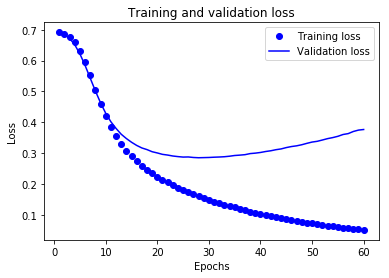

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

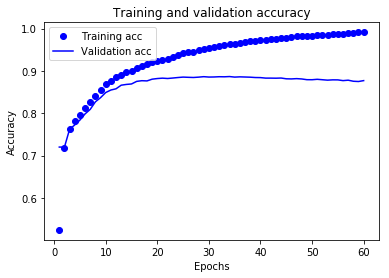

In [53]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()